In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

In [2]:
# load the MOM6 data
db='/g/data/ik11/outputs/mom6-panan/panant.db' 
expts = ['panant-v2','panant-hycom1','panant-01-zstar']

In [3]:
session = cc.database.create_session(db)

In [4]:
client = Client()
client

distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-qg1ju6fq', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-ltroe63w', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-8espy6aw', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-w9dq035h', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-5kvdgje2', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-xxengm_5', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/g40/hm1221/tmp/dask-worker-space/worker-arjlqcw4', purging
distributed.diskutils - INFO - Found stale lock file and direc

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:32803,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.142:34421,Total threads: 4
Dashboard: /proxy/37001/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:45857,


In [5]:
# time period
start_time = '1995-01-01'
end_time = '1996-01-01'
# set the threshold of density(AABW)
rho_AABW = 1037.175

In [6]:
# load MOM6 hmo(x,y,rho,t)
flux = cc.querying.getvar('panant-01-zstar','hmo',session,start_time=start_time, end_time=end_time)

# streamfunctiom transect
flux = flux.sel(time = slice(start_time,end_time)).sel(xh = 10.,method = 'nearest')/1e9
flux = flux.mean('time').cumsum('yh')。load()

[Text(0, 0.5, '')]

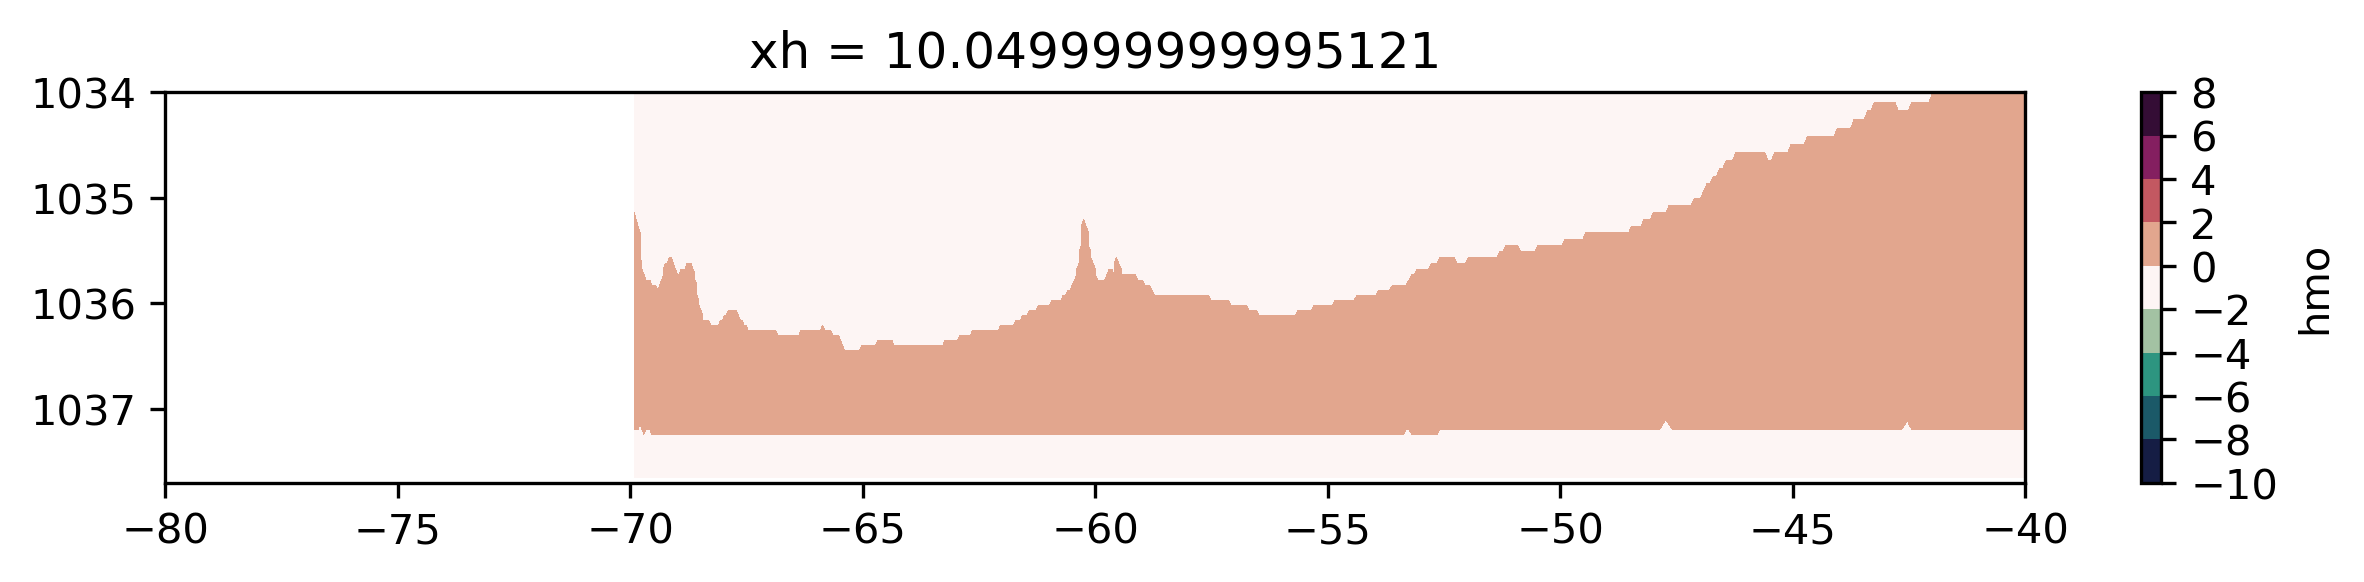

In [8]:
plt.figure(figsize=(10,10),dpi = 300)
ax = plt.subplot(5,1,1)
p1 = flux.plot.contourf(ax=ax, levels = np.arange(-10,10,2),cmap=cm.cm.curl)
plt.ylim(1034,1037.7)
plt.xlim(-80,-40)
plt.gca().invert_yaxis()
ax.set(xlabel=None)
ax.set(ylabel=None)